In [1]:
from src.SynthSeg import SynthSeg
from src.Labels import Labels
from src.StatisticalAnalysis import StatisticalAnalysis

In [2]:
# Get dataframes for each disorder
adhd = Labels().adhd_df
anx = Labels().anx_df
conduct = Labels().conduct_df
depr = Labels().depr_df
opposit = Labels().opposit_df
somaticpr = Labels().somaticpr_df

In [26]:
def get_sig_rois(labels_df, run_qc=True):
    synthseg = SynthSeg(
        subjects=labels_df.index,
        run_qc=run_qc,
        run_qc_min_score=0.65,
        run_qc_max_failed_regions=1,
    )
    if run_qc:
        synthseg_df = synthseg.qc_df
    else:
        synthseg_df = synthseg.df
    
    synthseg_with_labels = synthseg_df.join(labels_df)
    
    control_df = synthseg_df[synthseg_with_labels[labels_df.name] == 0]
    disorder_df = synthseg_df[synthseg_with_labels[labels_df.name] == 1]
    
    print(labels_df.name.split("_")[0].upper())
    print("-"*10)
    print("# control: \t\t", control_df.shape[0])
    print("# disorder: \t\t", disorder_df.shape[0])

    synthseg_conditions = StatisticalAnalysis(
        control_df,
        disorder_df,
        ind=True,
        scale=False,
        dataset_names=["control", "disorder"],
    )

    synthseg_sig_vols, synthseg_all_stats = synthseg_conditions.compare()

    print(f"# different regions: \t {synthseg_sig_vols.shape[0]}")

    return synthseg_sig_vols, synthseg_conditions

# ADHD

In [60]:
vols, stats = get_sig_rois(adhd)
vols

ADHD
----------
# control: 		 1156
# disorder: 		 266
# different regions: 	 8


,feature,p_value
2,4th ventricle,0.004817
3,left hippocampus,0.006778
5,right hippocampus,0.011706
0,left cerebellum white matter,0.015033
4,right cerebellum white matter,0.021474
1,left caudate,0.025531
6,right accumbens area,0.039048
7,ctx-rh-postcentral,0.045560


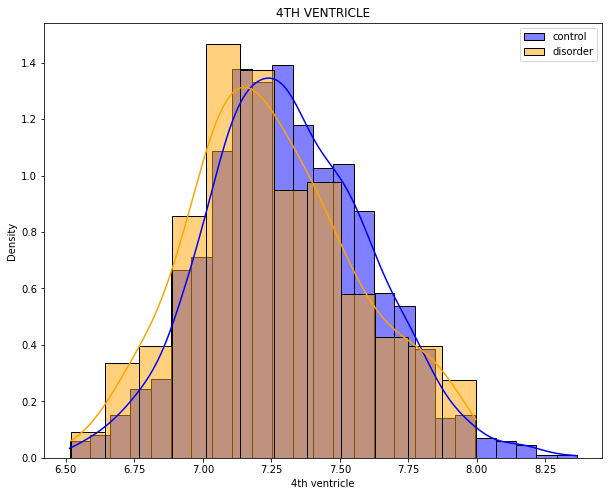

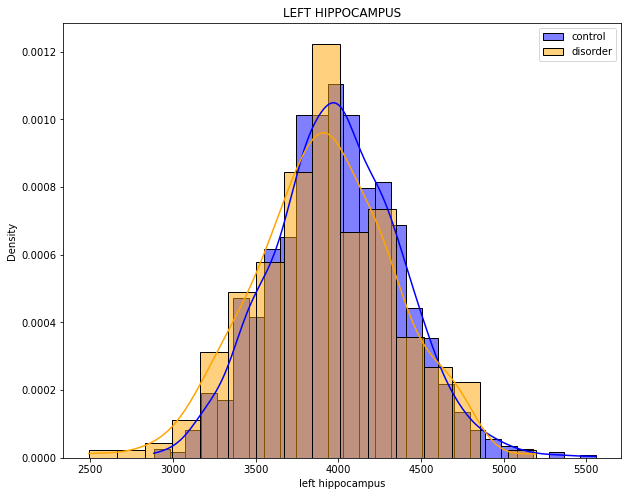

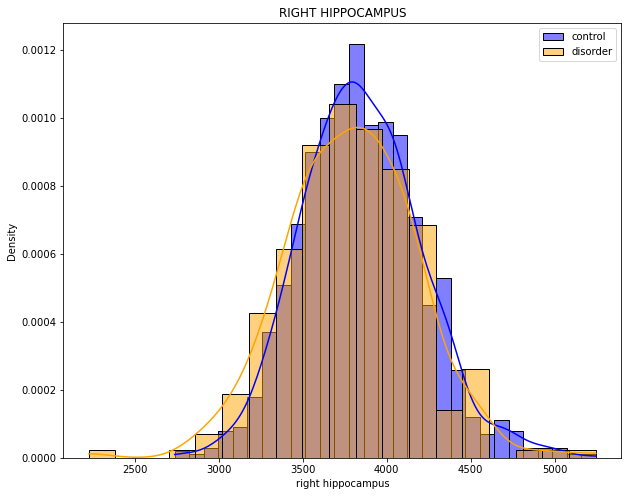

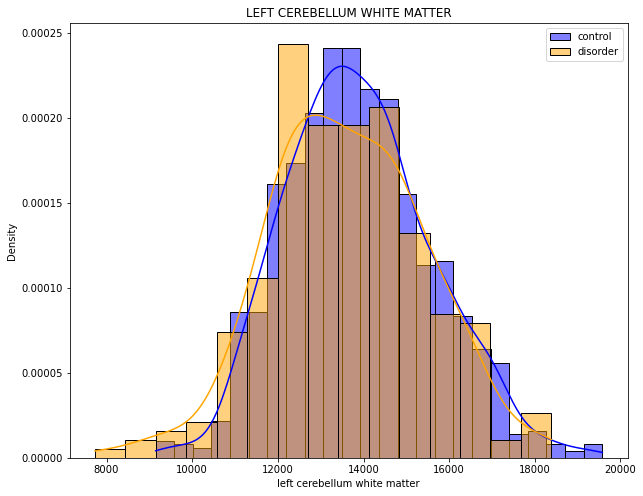

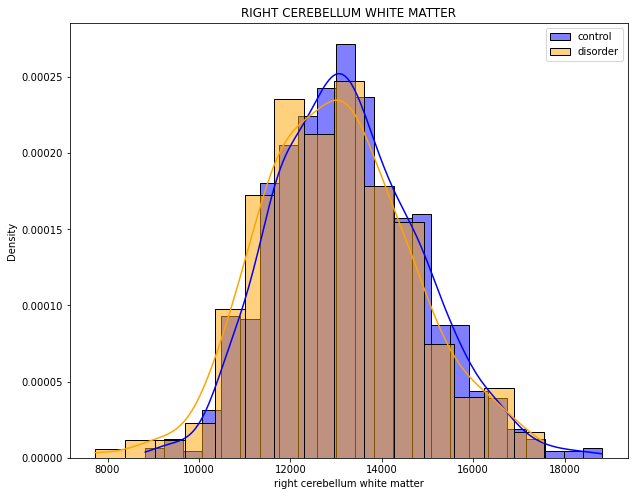

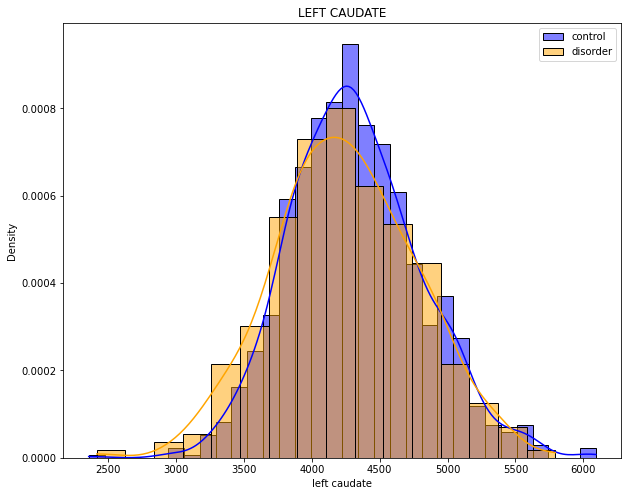

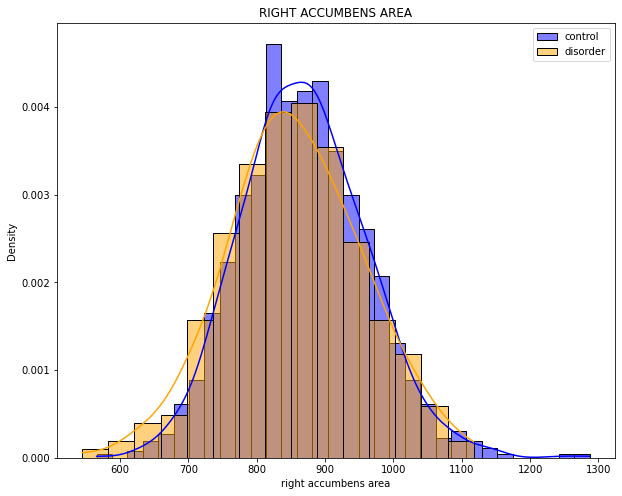

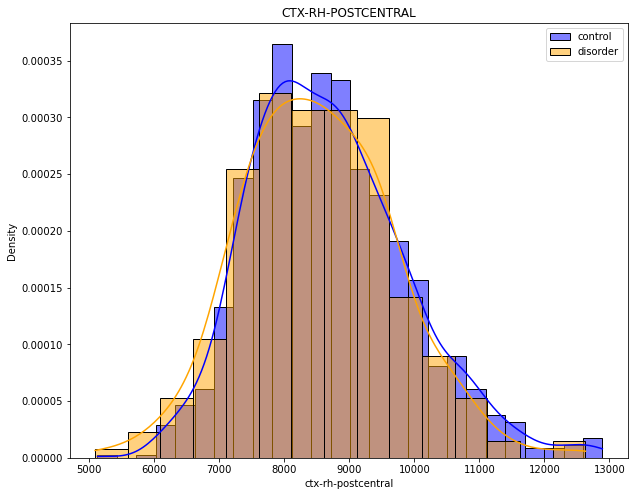

In [61]:
for f in vols["feature"]:
    stats.plot_hist(f)

# Anxiety

In [38]:
vols, stats = get_sig_rois(anx)
vols

ANXDISORD
----------
# control: 		 1156
# disorder: 		 301
# different regions: 	 1


,feature,p_value
0,ctx-rh-lateraloccipital,0.013958


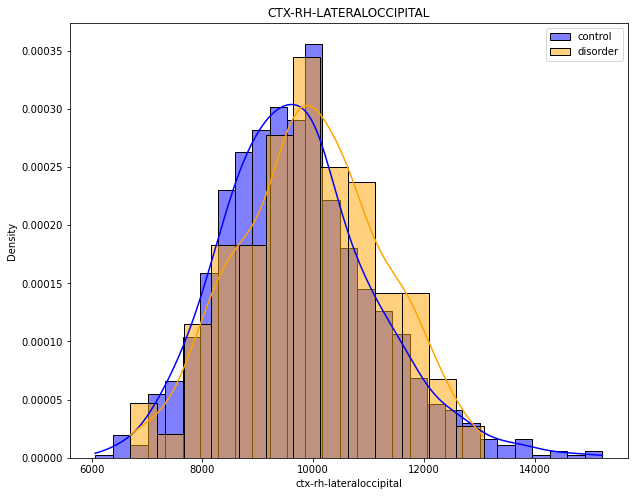

In [39]:
for f in vols["feature"]:
    stats.plot_hist(f)

# Conduct disorder

In [47]:
vols, stats = get_sig_rois(conduct)
vols

CONDUCT
----------
# control: 		 1156
# disorder: 		 260
# different regions: 	 78


,feature,p_value
2,left cerebral cortex,0.000005
10,left hippocampus,0.000005
16,right cerebral cortex,0.000008
21,right hippocampus,0.000008
50,ctx-lh-supramarginal,0.000014
...,...,...
33,ctx-lh-lingual,0.041281
5,left cerebellum cortex,0.045694
34,ctx-lh-medialorbitofrontal,0.047899
55,ctx-rh-cuneus,0.048716


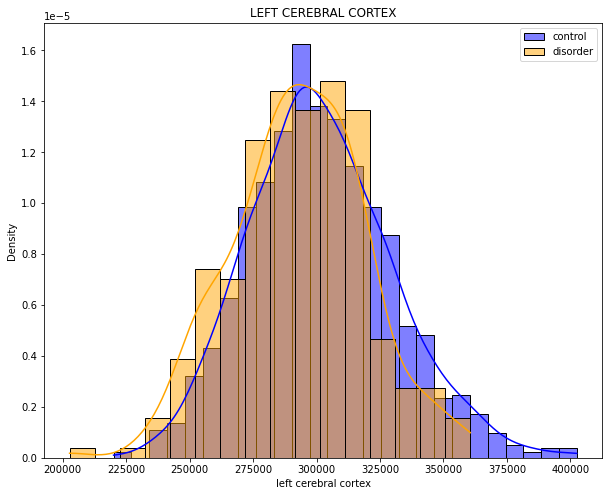

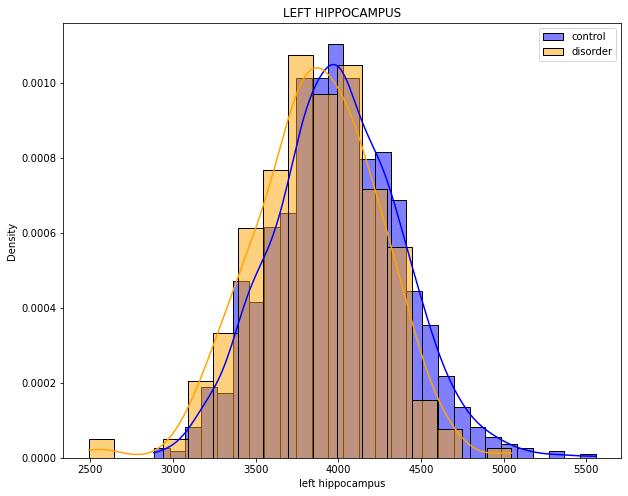

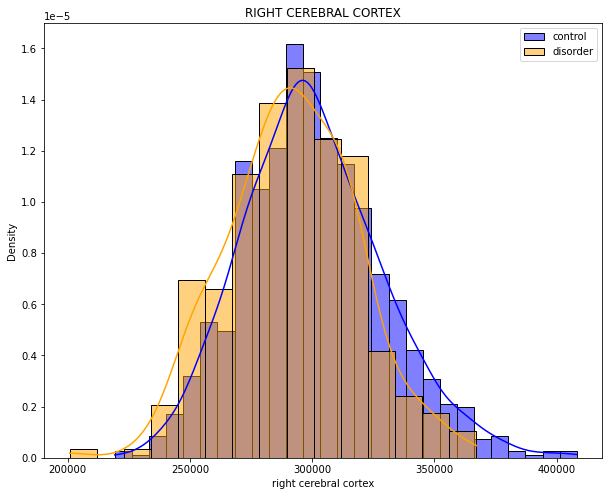

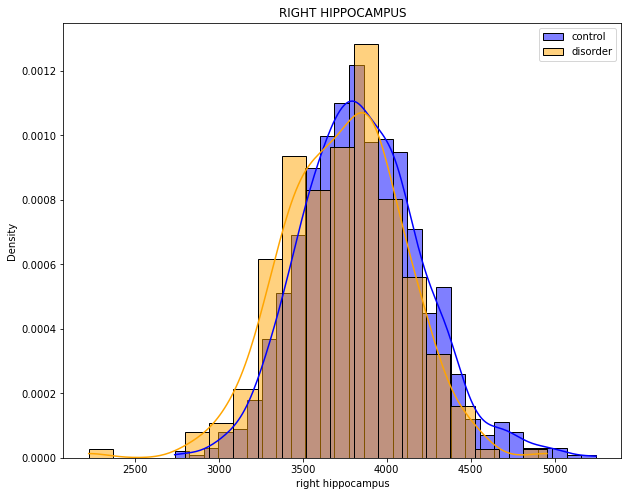

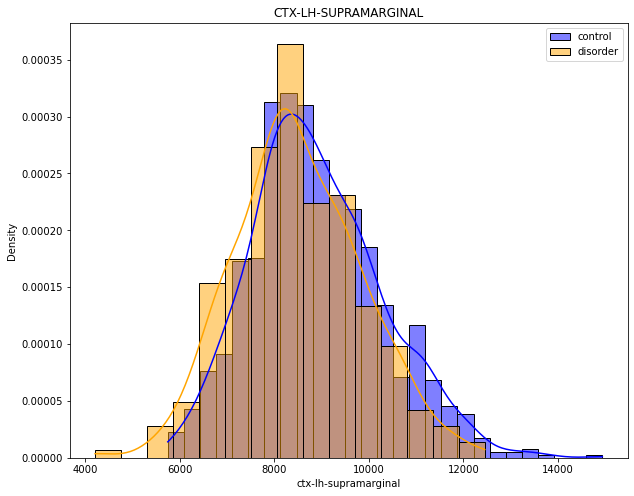

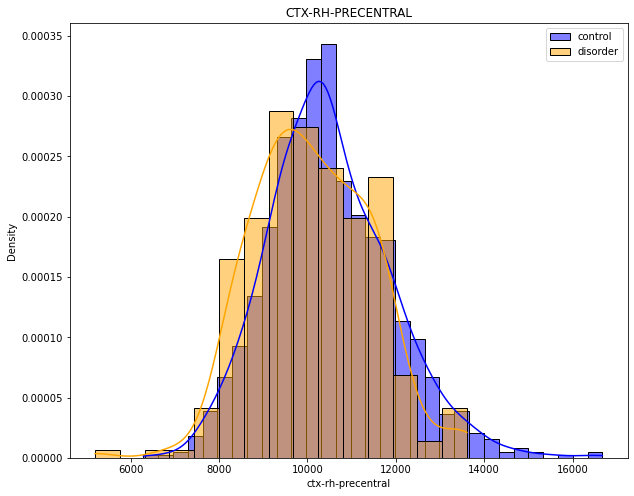

In [41]:
for f in vols["feature"][:6]:
    stats.plot_hist(f)

# Depression

In [49]:
vols, stats = get_sig_rois(depr)
vols

DEPRESS
----------
# control: 		 1156
# disorder: 		 274
# different regions: 	 19


,feature,p_value
15,ctx-rh-postcentral,0.000244
12,ctx-lh-postcentral,0.000851
6,right cerebellum white matter,0.004310
16,ctx-rh-precentral,0.012376
17,ctx-rh-superiortemporal,0.015992
18,ctx-rh-supramarginal,0.016068
13,ctx-lh-precentral,0.016420
4,left hippocampus,0.017547
3,brain-stem,0.017863
0,left cerebral cortex,0.018393


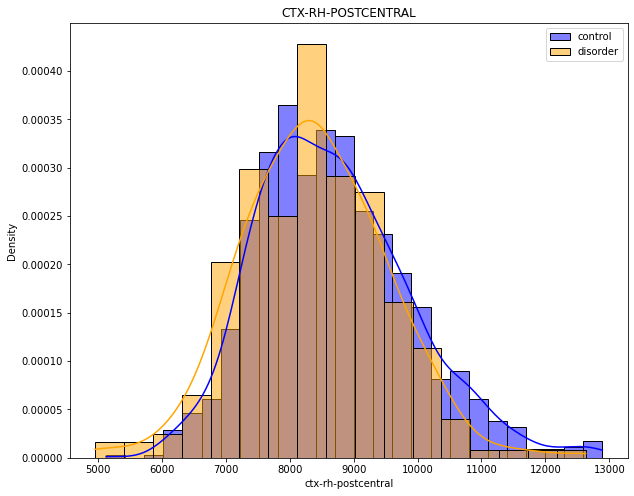

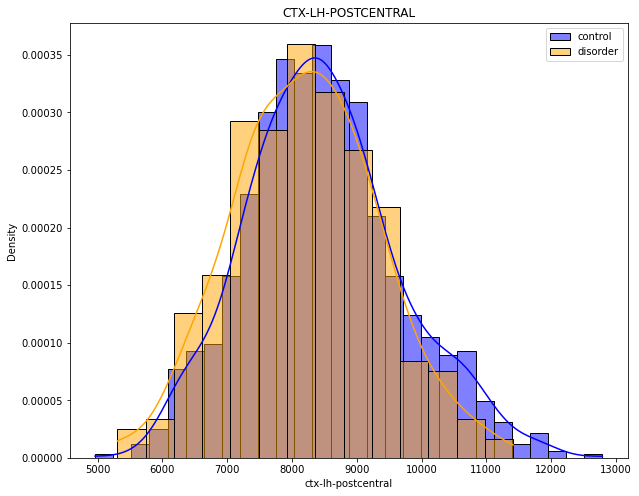

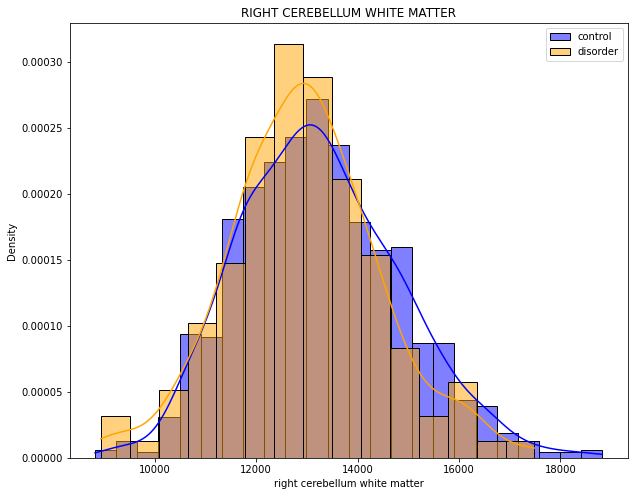

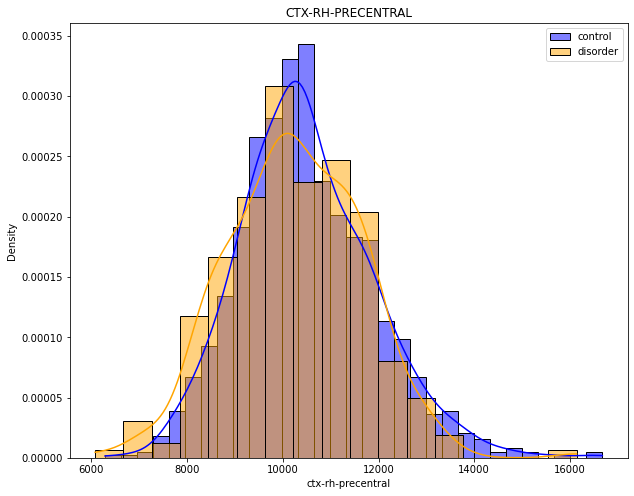

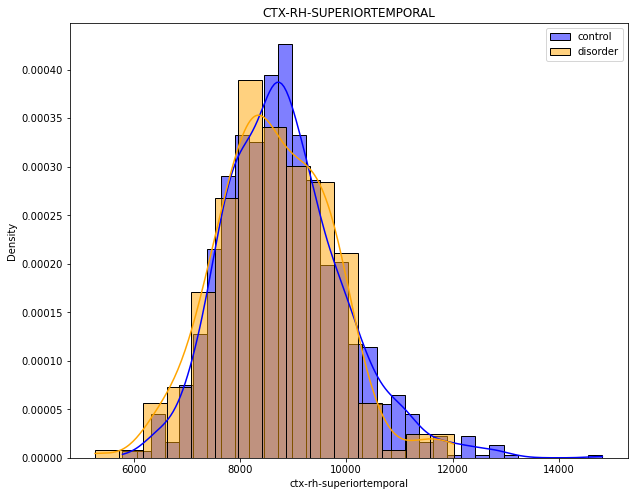

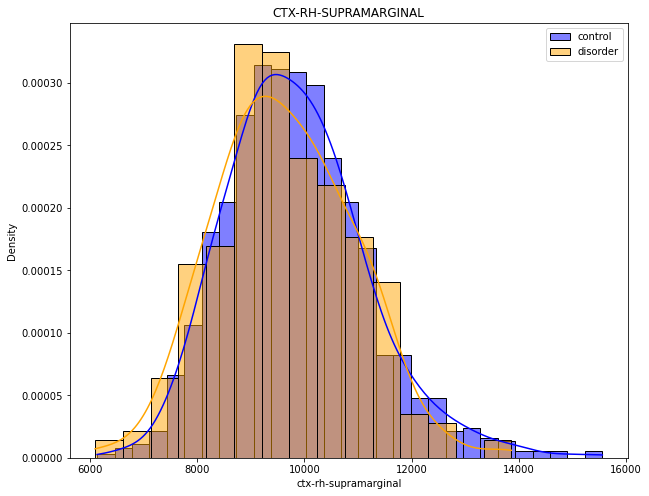

In [50]:
for f in vols["feature"][:6]:
    stats.plot_hist(f)

# Opposition

In [54]:
vols, stats = get_sig_rois(opposit)
vols

OPPOSIT
----------
# control: 		 1156
# disorder: 		 305
# different regions: 	 2


,feature,p_value
0,left lateral ventricle,0.019485
1,ctx-rh-parstriangularis,0.034827


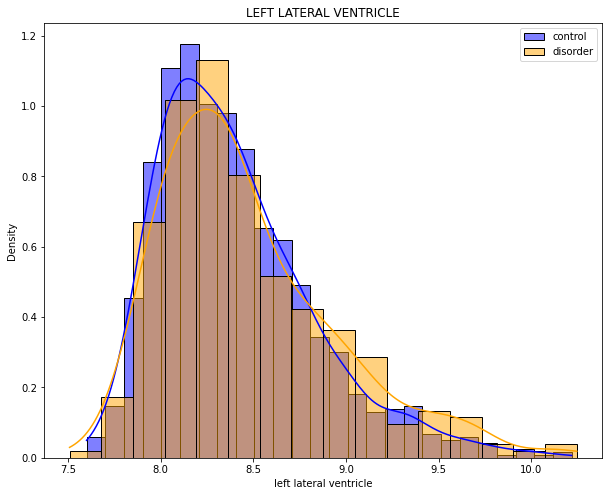

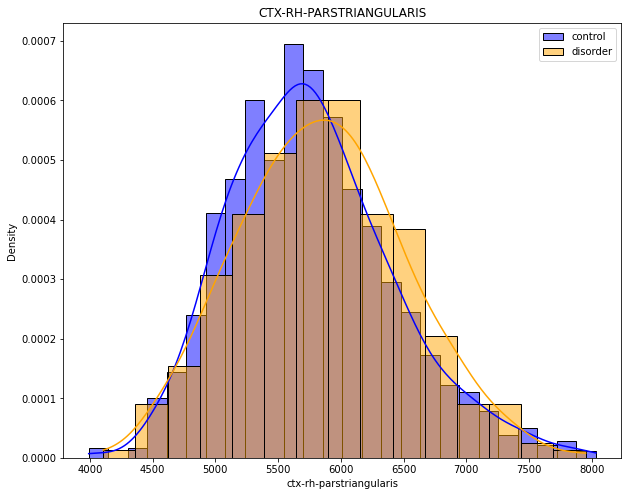

In [55]:
for f in vols["feature"]:
    stats.plot_hist(f)

# Somatic

In [56]:
vols, stats = get_sig_rois(somaticpr)
vols

SOMATICPR
----------
# control: 		 1156
# disorder: 		 355
# different regions: 	 3


,feature,p_value
0,right inferior lateral ventricle,0.021299
1,right cerebellum white matter,0.028094
2,right pallidum,0.048255


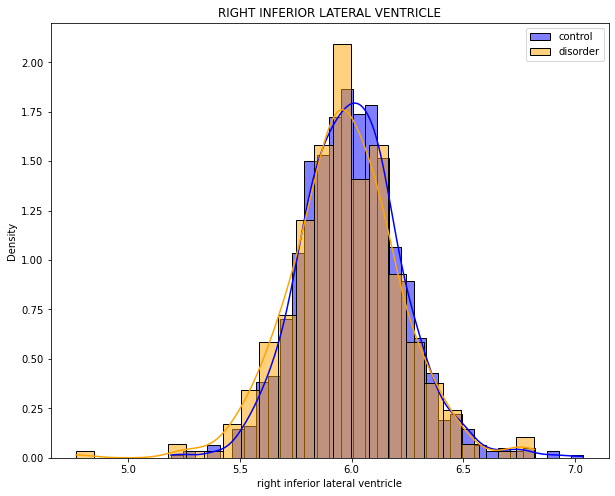

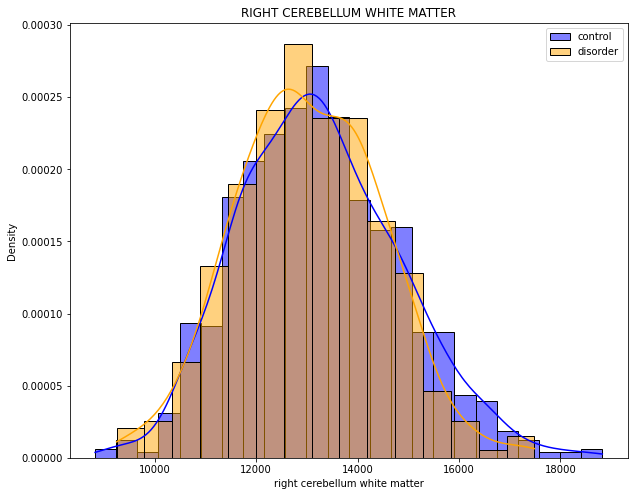

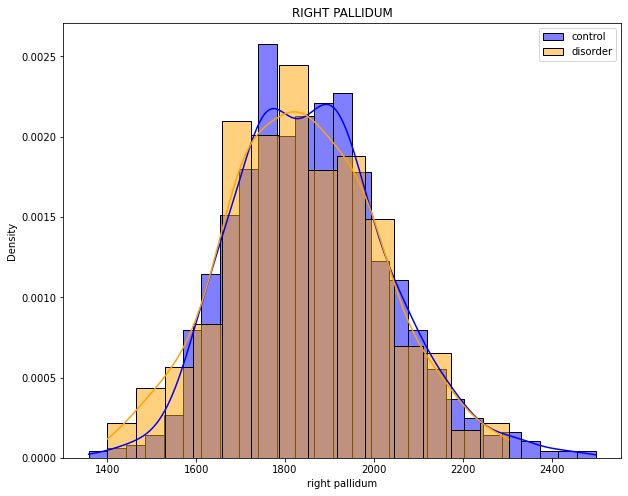

In [57]:
for f in vols["feature"]:
    stats.plot_hist(f)